In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

sns.set_theme()

In [54]:
friends = pd.DataFrame(
    {
        "Friends Daniel": [9, 7, 8, 9, 8, 9, 9, 10, 9, 9],
        "Friends Kyra": [9, 6, 7, 8, 7, 9, 8, 8, 8, 7],
    },
    index=[f"friend_{num}" for num in range(1, 11)],
)
friends

,Friends Daniel,Friends Kyra
friend_1,9,9
friend_2,7,6
friend_3,8,7
friend_4,9,8
friend_5,8,7
friend_6,9,9
friend_7,9,8
friend_8,10,8
friend_9,9,8
friend_10,9,7


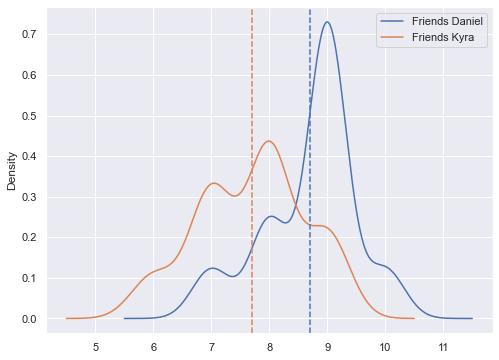

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

friends.plot.kde(bw_method=0.4, ax=ax)
ax.axvline(friends["Friends Daniel"].mean(), linestyle="--")
ax.axvline(friends["Friends Kyra"].mean(), color="C1", linestyle="--")

In [92]:
alpha = 0.05
t_stat, p_val, d_o_f = sm.stats.ttest_ind(
    friends["Friends Daniel"], friends["Friends Kyra"]
)
mean_daniel, mean_kyra = (
    friends["Friends Daniel"].mean(),
    friends["Friends Kyra"].mean(),
)
x_bar_diff = mean_daniel - mean_kyra
std_daniel, std_kyra = (
    friends["Friends Daniel"].std(),
    friends["Friends Kyra"].std(),
)
n_daniel, n_kyra = friends["Friends Daniel"].size, friends["Friends Kyra"].size
pooled_est_std_dev = np.sqrt(
    ((n_daniel - 1) * std_daniel**2 + (n_kyra - 1) * std_kyra**2)
    / (n_daniel + n_kyra - 2)
)
t_95 = st.t.ppf(1 - alpha / 2, (n_daniel + n_kyra - 2))
conf_int_upper = x_bar_diff + t_95 * pooled_est_std_dev * np.sqrt(
    1 / n_daniel + 1 / n_kyra
)
conf_int_lower = x_bar_diff - t_95 * pooled_est_std_dev * np.sqrt(
    1 / n_daniel + 1 / n_kyra
)
print(
    f"t = {t_stat:.3f}, df = {d_o_f}, p-value = {p_val:.4f}",
    f"Alternative hypothesis: true difference in means between {' & '.join(friends.columns)} is not equal to 0",
    "95 percent confidence interval:",
    f"{conf_int_lower:.7f} {conf_int_upper:.7f}",
    "sample estimates:",
    f"mean in group {friends.columns[0]}: {mean_daniel:.1f}\t\tmean in group{friends.columns[1]}: {mean_kyra:.1f}",
    sep="\n",
)

t = 2.518, df = 18.0, p-value = 0.0215
Alternative hypothesis: true difference in means between Friends Daniel & Friends Kyra is not equal to 0
95 percent confidence interval:
0.1654875 1.8345125
sample estimates:
mean in group Friends Daniel: 8.7		mean in groupFriends Kyra: 7.7


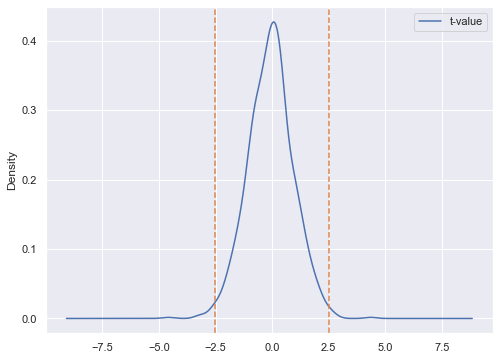

In [117]:
fig, ax = plt.subplots(figsize=(8, 6))

pd.DataFrame(
    {"t-value": st.t.rvs(df=(n_daniel + n_kyra - 2), size=1000)}
).plot.kde(ax=ax)
ax.axvline(t_stat, color="C1", linestyle="--")
ax.axvline(-t_stat, color="C1", linestyle="--")

>Which p-values you can expect is completely determined by the statistical power of the study, or the probability that you will observe a significant effect, if there is a true effect. The statistical power ranges from 0 to 1. We can illustrate this by simulating one-sample t-tests. The idea is that we simulate IQ scores for a group of people. We know the standard deviation of IQ scores is 15. For now, we will set the mean IQ score in the simulated group to 105, which we will compare to the average IQ score of all people (which is known to be 100 – that’s how IQ tests are normalized). We are testing if the people in our simulated sample have an IQ that differs from the average (and we know the correct answer is ‘yes’, because we made it so in the simulation).

Power = 0.50483


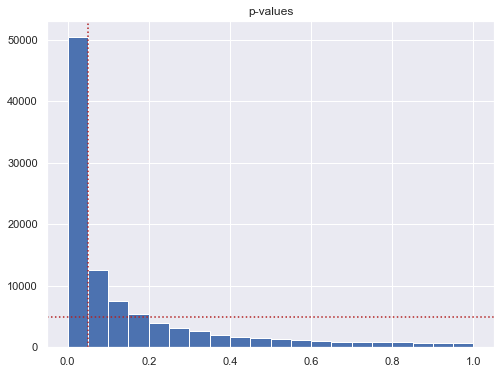

In [153]:
p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 71

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests
fig, ax = plt.subplots(figsize=(8, 6))

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=ax)
ax.axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")

Larger samples = higher power, steeper p-value distribution (more p_values < 0.05)

Power = 0.81905


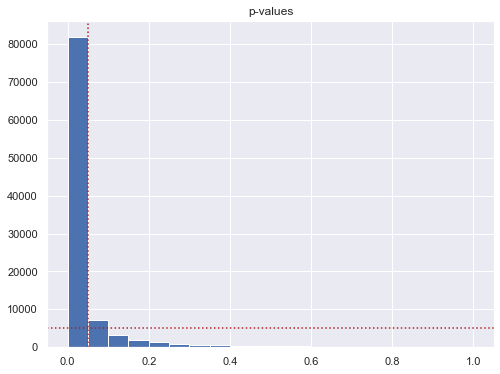

In [154]:
p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 150

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests
fig, ax = plt.subplots(figsize=(8, 6))

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=ax)
ax.axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")

Smaller samples = lower power, flatter p-value distribution (more p_values > 0.05)

Power = 0.27912


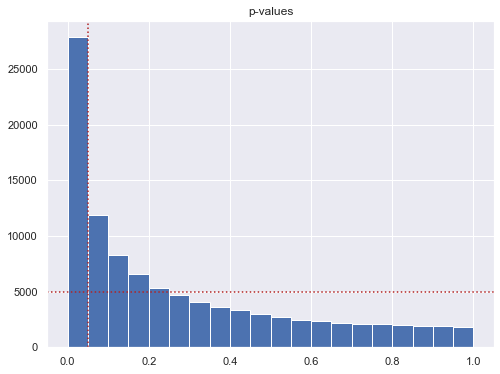

In [155]:
p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 35

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests
fig, ax = plt.subplots(figsize=(8, 6))

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=ax)
ax.axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")

When there is **NO true effect** (group A = B), the p-value distribution is uniform.

Power = 0.05085


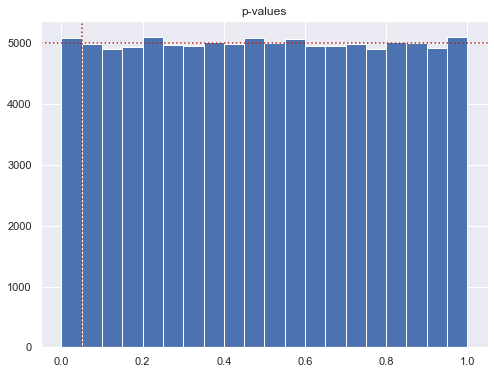

In [156]:
p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 71

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=100, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests
fig, ax = plt.subplots(figsize=(8, 6))

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=ax)
ax.axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")

As the statistical power increases, some p-values below 0.05 (e.g., p = 0.04) can be more likely when there is no effect than when there is an effect. This is known as Lindley's paradox (Lindley, 1957), or sometimes the Jeffreys-Lindley paradox (Spanos, 2013). 

Power = 0.50318
Power = 0.82188
Power = 0.2795
Power = 0.04887


[(0.0, 80000.0), (0.0, 80000.0), (0.0, 80000.0), (0.0, 80000.0)]

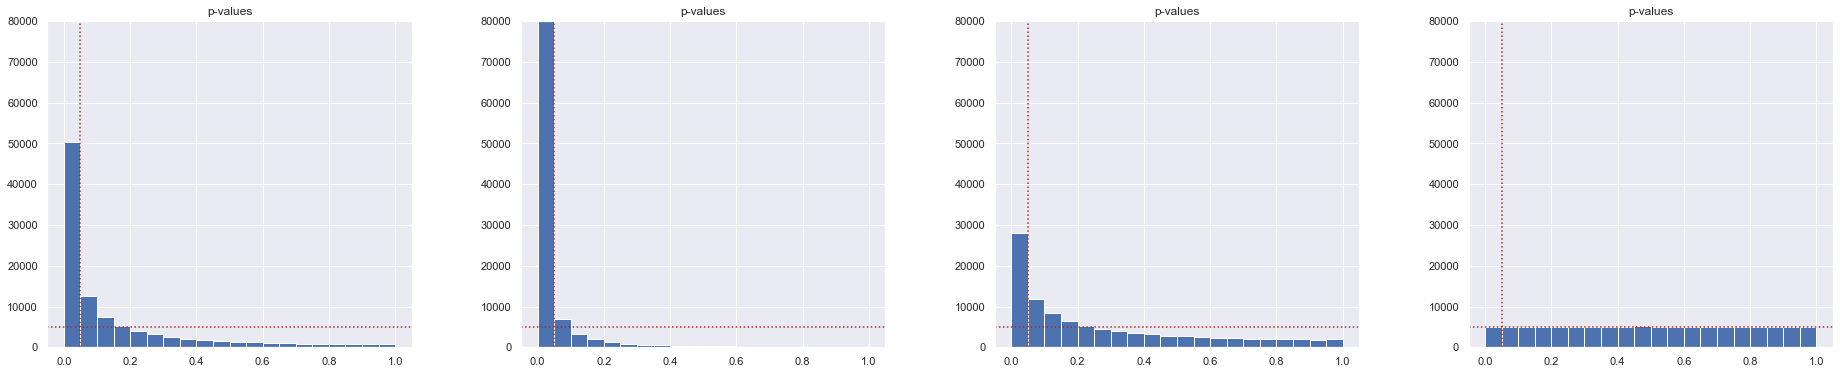

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(32, 6))

p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 71

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=axes[0])
axes[0].axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
axes[0].axvline(alpha, color="firebrick", linestyle="dotted")

p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 150

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=axes[1])
axes[1].axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
axes[1].axvline(alpha, color="firebrick", linestyle="dotted")

p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 35

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=105, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=axes[2])
axes[2].axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
axes[2].axvline(alpha, color="firebrick", linestyle="dotted")

p_vals = []
num_tests = 100_000
alpha = 0.05
sample_size = 71

for _ in range(num_tests):
    x = np.random.normal(loc=100, scale=15, size=sample_size)
    y = np.random.normal(loc=100, scale=15, size=sample_size)
    p_vals.append(sm.stats.ttest_ind(x, y)[1])

p_vals = np.array(p_vals)
power = np.sum(p_vals < alpha) / num_tests

print(f"Power = {power}")
pd.DataFrame({"p-values": p_vals}).hist(bins=20, ax=axes[3])
axes[3].axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
axes[3].axvline(alpha, color="firebrick", linestyle="dotted")

[axes[num].set_ylim((0, 80000)) for num in range(4)]

Below are two simulation that are exactly the same except for the sized of the compared samples. In this case, we know for a fact the null hypothesis, that there are no differences between the groups, is **TRUE**. Hence, at $\alpha = 0.05$ any mean differences that falls outside of the orange dashed lines are type-1 errors (false positives.)

[(-1.0, 1.0), (-1.0, 1.0)]

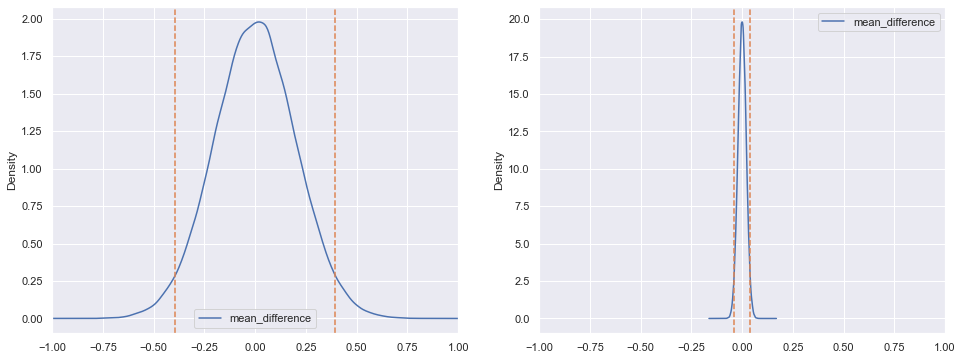

In [176]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
num_tests = 100_000
alpha = 0.05

sample_size = 50
mean_diffs = []

for _ in range(num_tests):
    x = np.random.normal(scale=1, size=sample_size)
    y = np.random.normal(scale=1, size=sample_size)
    mean_diff = x.mean() - y.mean()
    mean_diffs.append(mean_diff)

pd.DataFrame({"mean_difference": mean_diffs}).plot.kde(ax=axes[0])
[
    axes[0].axvline(
        np.quantile(np.array(mean_diffs), [0.025, 0.975])[num],
        color="C1",
        linestyle="--",
    )
    for num in range(2)
]

sample_size = 5000
mean_diffs = []

for _ in range(num_tests):
    x = np.random.normal(scale=1, size=sample_size)
    y = np.random.normal(scale=1, size=sample_size)
    mean_diff = x.mean() - y.mean()
    mean_diffs.append(mean_diff)

pd.DataFrame({"mean_difference": mean_diffs}).plot.kde(ax=axes[1])
[
    axes[1].axvline(
        np.quantile(np.array(mean_diffs), [0.025, 0.975])[num],
        color="C1",
        linestyle="--",
    )
    for num in range(2)
]
[axes[num].set_xlim((-1, 1)) for num in range(2)]

Text(0.5, 1.0, 'p-value distribution with 50.0% power')

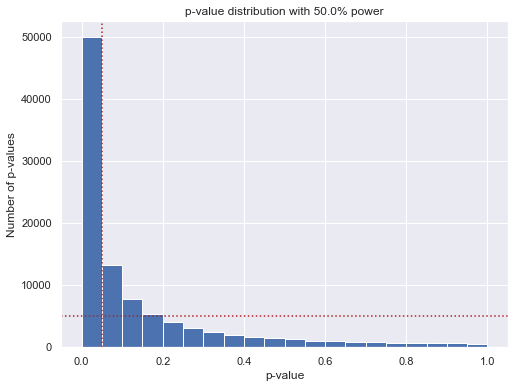

In [183]:
nsims = 100_000
mean_sample = 106
n_samples = 26
std_sims = 15

p_vals = []
bins = 20

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(num_tests * alpha, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

**Q1:** Since the statistical power is the probability of observing a statistically significant result, if there is a true effect, we can also see the power in the figure itself. Where?


1. We can calculate the number of p-values larger than 0.5, and divide them by the number of simulations.
2. **We can calculate the number of p-values in the first bar (which contains all ‘significant’ p-values from 0.00 to 0.05) and divide the p-values in this bar by the total number of simulations.**
3. We can calculate the difference between p-values above 0.5 minus the p-values below 0.5, and divide this number by the total number of simulations.
4. We can calculate the difference between p-values above 0.5 minus the p-values below 0.05, and divide this number by the number of simulatio
   


In [186]:
np.sum(p_vals < 0.05) / nsims

0.50115

**Q2:** Change the sample size from n <- 26 to n <- 51. Run the simulation by selecting all lines and pressing CTRL+Enter. What is the power in the simulation now that we have increased the sample size from 26 people to 51 people?

1. 55%
2. 60%
3. **80%**
4. 95%


Text(0.5, 1.0, 'p-value distribution with 80.0% power')

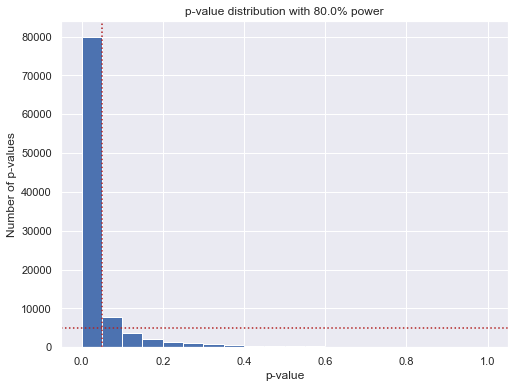

In [193]:
nsims = 100_000
mean_sample = 106
n_samples = 51
std_sims = 15

p_vals = []
bins = 20

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

**Q3:** If you look at the distribution of p-values, what do you notice?

1. The p-value distribution is exactly the same as with 50% power
2. **The p-value distribution is much steeper than with 50% power**
3. The p-value distribution is much flatter than with 50% power
4. The p-value distribution is much more normally distributed than with 50% power

**Q4:** What would happen when there is no true difference between our simulated samples and the average IQ score? In this situation, we have no probability to observe an effect, so you might say we have ‘0 power’. Formally, power is not defined when there is no true effect. However, we can casually refer to this as 0 power. Change the mean in the sample to 100 (set m <- 106 to m <- 100) There is now no difference between the mean in our sample, and the population value we are testing against in the one-sample t-test. Run the script again. What do you notice?

1. The p-value distribution is exactly the same as with 50% power
2. The p-value distribution is much steeper than with 50% power
3. **The p-value distribution is basically completely flat (ignoring some minor variation due to random noise in the simulation)**
4. The p-value distribution is normally distributed

Text(0.5, 1.0, 'p-value distribution with 5.0% power')

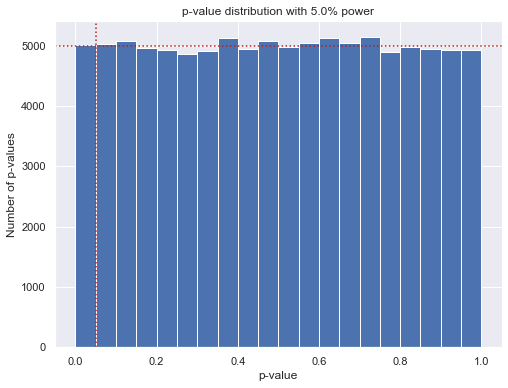

In [194]:
nsims = 100_000
mean_sample = 100
n_samples = 51
std_sims = 15

p_vals = []
bins = 20

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

**Q5:** Look at the leftmost bar in the plot produced for Q4, and look at the frequency of p-values in this bar. What is the formal name for this bar?

1. **The power (or true positives)**
2. The true negatives
3. The Type 1 error (or false positives)
4. The Type 2 error (or false negatives)


Let’s take a look at just the p-values below 0.05. Bear with me for the next few steps – it will be worth it. Find the variable that determines how many bars there are, in the statement bars <- 20. Change it to bars <- 100. We will now get 1 bar for p-values between 0 and 0.01, one bar for p-values between 0.01 and 0.02, and 100 bars in total. The red dotted line will now indicate the frequency of p-values when the null hypothesis is true, where every bar contains 1% of the total number of p-values. We only want to look at p-values below 0.05, and we will cut off the plot at 0.05. Change xlim = c(0, 1) to xlim = c(0, 0.05). Instead of seeing all p-values between 0 and 1, we will only see p-values between 0 and 0.05. Re-run the simulation (still with m <- 100). We see the same uniform distribution, but now every bar contains 1% of the p-values, so the p-value distribution is very flat and almost impossible to see (we will zoom in on the y-axis later this assignment). The red line now clearly gives the frequency for each bar, assuming the null hypothesis is true.

Text(0.5, 1.0, 'p-value distribution with 5.0% power')

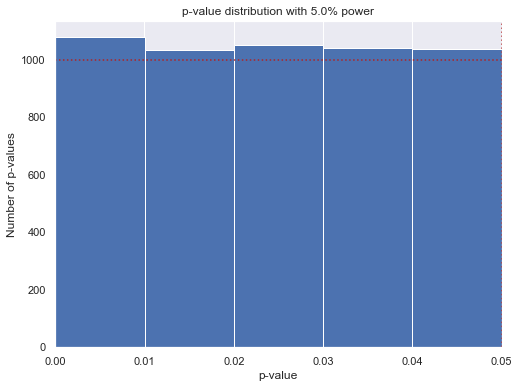

In [195]:
nsims = 100_000
mean_sample = 100
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

Change the mean in the simulation in line 9 to m <- 107 (remember n is still 51). Re-run the simulation. It’s clear we have very high power. Most p-values are in the left-most bar, which contains all p-values between 0.00 and 0.01.

Text(0.5, 1.0, 'p-value distribution with 90.0% power')

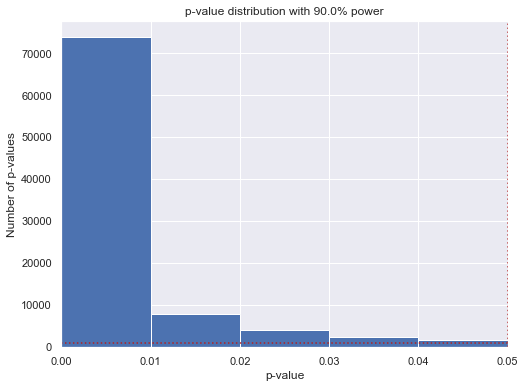

In [196]:
nsims = 100_000
mean_sample = 107
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

**Q6:** The plot from the last simulation tells you we have 90.5% power. This is the power if we use an alpha of 5%. But we can also use an alpha of 1%. What is the statistical power we have in the simulated studies when we would use an alpha of 1%, looking at the graph? Pick the answer closest to the answer from your simulations.

1. ~90%
2. **~75%**
3. ~50%
4. ~5%

Change the mean in the sample to 108 in m <- 108), and leave the sample size at 51. Run the simulation. Look at how the distribution has changed compared to the graph above.

Look at the fifth bar from the left. This bar now contains all the p-values between 0.04 and 0.05. You will notice something peculiar. Remember that the red dotted line indicates the frequency in each bar, assuming the null hypothesis is true. See how the bar with p-values between 0.04 and 0.05 is lower than the red line. We have simulated studies with 96% power. When power is very high, p-values between 0.04 and 0.05 are very rare – they occur less than 1% of the time (most p-values are smaller than 0.01). When the null hypothesis is true, p-values between 0.04 and 0.05 occur exactly 1% of the time (because p-values are uniformly distributed).

Text(0.5, 1.0, 'p-value distribution with 96.0% power')

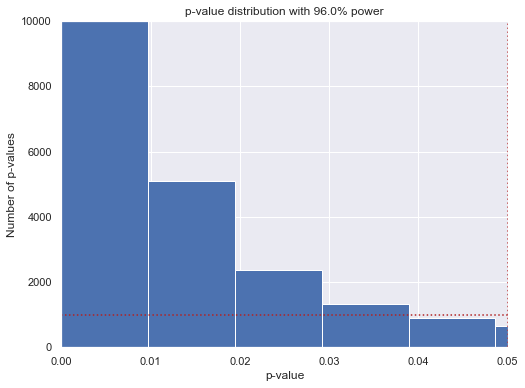

In [199]:
nsims = 100_000
mean_sample = 108
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.set_ylim((0, 10000))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

Now ask yourself: When you have very high power, and you observe a p-value between 0.04 and 0.05, is it more likely that the null hypothesis is true, or that the alternative hypothesis is true? Given that you are more likely to observe p-values between 0.04 and 0.05 when the null hypothesis is true, than when the alternative hypothesis is true, you should interpret a p-value significant with an alpha of 0.05 as more likely when the null hypothesis is true, than when the alternative hypothesis is true.

In our simulations, we know there is a true effect or not, but in the real world, you don’t know. When you have very high power, use an alpha level of 0.05, and find a p-value of p = .045, the data is surprising, assuming the null hypothesis is true, but it is even more surprising, assuming the alternative hypothesis is true. This shows how a significant p-value is not always evidence for the alternative hypothesis.

**Q7:** When you know you have very high (e.g., 98%) power for the smallest effect size you care about, and you observe a p-value of 0.045, what is the correct conclusion?

1. The effect is significant, and provides strong support for the alternative hypothesis.
2. The effect is significant, but it is without any doubt a Type 1 error.
3. With high power, you should use an alpha level that is smaller than 0.05, and therefore, this effect can not be considered significant.
4. **The effect is significant, but the data are more likely under the null hypothesis than under the alternative hypothesis.**

**Q8**: Play around with the sample size (n) and the mean (m) by changing the numerical values or both (and thus, vary the statistical power in the simulated studies). Look at the simulation result for the bar that contains p-values between 0.04 and 0.05. The red line indicates how many p-values would be found in this bar if the null hypothesis was true (and is always at 1%). At the very best, how much more likely is a p-value between 0.04 and 0.05 to come from a p-value distribution representing a true effect, than it is to come from a p-value distribution when there is no effect? You can answer this question by seeing how much higher the bar of p-values between 0.04 and 0.05 can become. If at best the bar in the simulation is five times as high at the red line (so the bar shows 5% of p-values end up between 0.04 and 0.05, while the red line remains at 1%), then at best p-values between 0.04 and 0.05 are five times as likely when there is a true effect than when there is no true effect.

1. At best, p-values between 0.04 and 0.05 are equally likely under the alternative hypothesis, and under the null hypothesis.
2. **At best, p-values between 0.04 and 0.05 are approximately 4 times more likely under the alternative hypothesis, than under the null hypothesis.**
3. At best, p-values between 0.04 and 0.05 are ~10 times more likely under the alternative hypothesis, than under the null hypothesis.
4. At best, p-values between 0.04 and 0.05 are ~30 times more likely under the alternative hypothesis, than under the null hypothesis.


Text(0.5, 1.0, 'p-value distribution with 15.0% power')

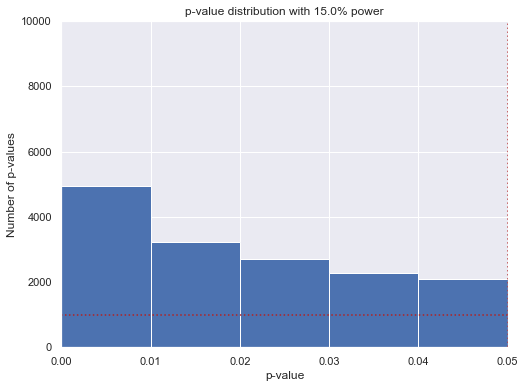

In [200]:
nsims = 100_000
mean_sample = 102
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.set_ylim((0, 10000))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

Text(0.5, 1.0, 'p-value distribution with 29.0% power')

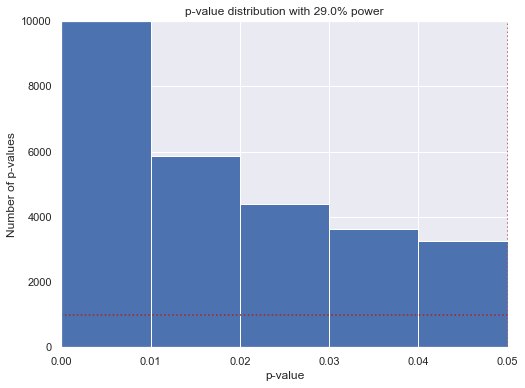

In [204]:
nsims = 100_000
mean_sample = 103
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.set_ylim((0, 10000))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

Text(0.5, 1.0, 'p-value distribution with 46.0% power')

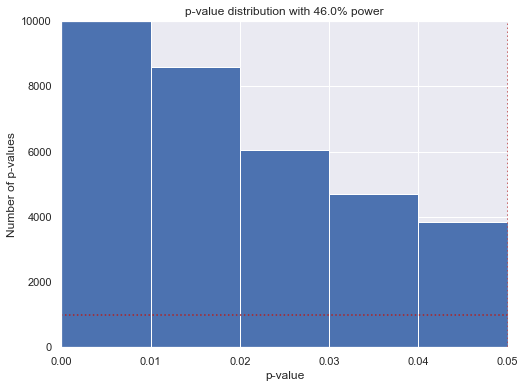

In [207]:
nsims = 100_000
mean_sample = 104
n_samples = 51
std_sims = 15

p_vals = []
bins = 100

for _ in range(nsims):
    x = np.random.normal(size=n_samples, scale=std_sims, loc=mean_sample)
    p_vals.append(st.ttest_1samp(x, popmean=100)[1])
    
p_vals = np.array(p_vals)
power = np.round(np.sum(p_vals < 0.05) / nsims, 2)


fig, ax = plt.subplots(figsize=(8, 6))
pd.DataFrame({"p-values": p_vals}).hist(bins=bins, ax=ax)
ax.axhline(nsims / bins, color="firebrick", linestyle="dotted")
ax.set_xlim((0, 0.05))
ax.set_ylim((0, 10000))
ax.axvline(alpha, color="firebrick", linestyle="dotted")
ax.set_xlabel("p-value")
ax.set_ylabel("Number of p-values")
ax.set_title(f"p-value distribution with {round(power * 100, 1)}% power")

For this reason, statisticians warn that p-values just below 0.05 (e.g., between 0.04 and 0.05) are at the very best weak support for the alternative hypothesis. If you find p-values in this range, consider replicating the study, or if that’s not possible, interpret the result at least a bit cautiously.

**Q1:** When the sample size in each group of an independent t-test is 50 observations (see Figure 1.6), which statement is correct?

1. The mean of the differences you will observe between the two groups is always 0.
2. The mean of the differences you will observe between the two groups is always different from 0.
3. **Observing a mean difference of +0.5 or -0.5 is considered surprising, assuming the null hypothesis is true.**
4. Observing a mean difference of +0.1 or -0.1 is considered surprising, assuming the null hypothesis is true.


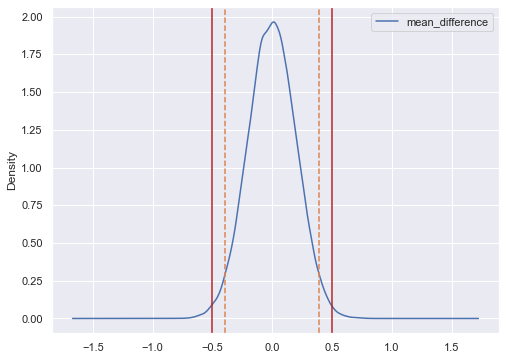

In [215]:
fig, ax = plt.subplots(figsize=(8, 6))
num_tests = 100_000
alpha = 0.05

sample_size = 50
mean_diffs = []

for _ in range(num_tests):
    x = np.random.normal(scale=1, size=sample_size)
    y = np.random.normal(scale=1, size=sample_size)
    mean_diff = x.mean() - y.mean()
    mean_diffs.append(mean_diff)

pd.DataFrame({"mean_difference": mean_diffs}).plot.kde(ax=ax)
[
    ax.axvline(
        np.quantile(np.array(mean_diffs), [0.025, 0.975])[num],
        color="C1",
        linestyle="--",
    )
    for num in range(2)
]
ax.axvline(0.5, color="firebrick")
ax.axvline(-0.5, color="firebrick")

**Q2:** In what sense are the null models in the figures (Figure 1.6 and 1.7) similar, and in what sense are they different?

1. **In both cases, the distributions are centered on zero, and the critical $t$-value is between $1.96$ and $2$ (for a two-sided test, depending on the sample size). But the larger the sample size, the closer to 0 the mean differences fall that are considered ‘surprising’.**
2. In both cases, a $t$-value of $0$ is the most likely outcome, but the critical t-value is around $0.4$ for $n = 50$, and around $0.05$ for $n = 5000$.
3. In both cases, means will vary in exactly the same way around $0$, but the Type 1 error rate is much smaller when $n = 5000$ than when $n = 50$.
4. Because the standard error is much larger for $n = 50$ than for $n = 5000$, it is much more likely that the null hypothesis is true for $n = 50$.


[(-1.0, 1.0), (-1.0, 1.0)]

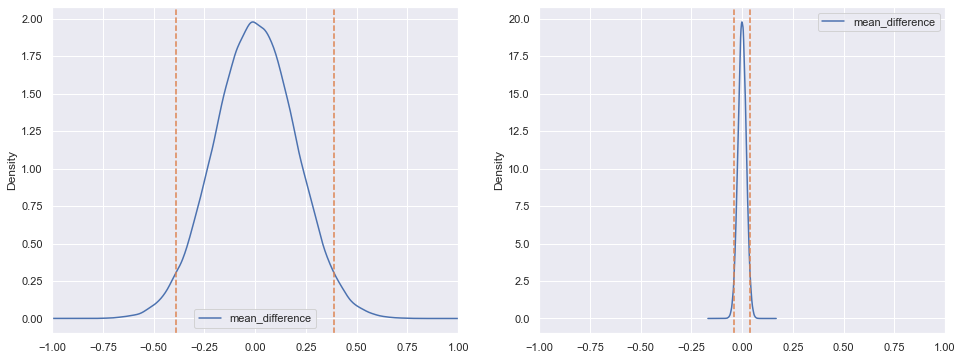

In [216]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
num_tests = 100_000
alpha = 0.05

sample_size = 50
mean_diffs = []

for _ in range(num_tests):
    x = np.random.normal(scale=1, size=sample_size)
    y = np.random.normal(scale=1, size=sample_size)
    mean_diff = x.mean() - y.mean()
    mean_diffs.append(mean_diff)

pd.DataFrame({"mean_difference": mean_diffs}).plot.kde(ax=axes[0])
[
    axes[0].axvline(
        np.quantile(np.array(mean_diffs), [0.025, 0.975])[num],
        color="C1",
        linestyle="--",
    )
    for num in range(2)
]

sample_size = 5000
mean_diffs = []

for _ in range(num_tests):
    x = np.random.normal(scale=1, size=sample_size)
    y = np.random.normal(scale=1, size=sample_size)
    mean_diff = x.mean() - y.mean()
    mean_diffs.append(mean_diff)

pd.DataFrame({"mean_difference": mean_diffs}).plot.kde(ax=axes[1])
[
    axes[1].axvline(
        np.quantile(np.array(mean_diffs), [0.025, 0.975])[num],
        color="C1",
        linestyle="--",
    )
    for num in range(2)
]
[axes[num].set_xlim((-1, 1)) for num in range(2)]

Which statement is true?

1. When the null hypothesis is true and the standard deviation is 1, if you randomly take 1 observation from each group and calculate the difference score, the differences will fall between -0.4 and 0.4 for 95% of the pairs of observations you will draw.
2. **When the null hypothesis is true and the standard deviation is 1, with n = 50 per group, 95% of studies where data is collected will observe in the long run a mean difference between -0.4 and 0.4.**
3. In any study with n = 50 per group, even when the SD is unknown and it is not known if the null hypothesis is true, you should rarely observe a mean difference more extreme than -0.4 or 0.4.
4. As the sample size increases, the expected distribution of means become narrower for the null model, but not for the alternative model.


**Q4:** Open the app once more with the default settings. Set the slider for the alpha level to 0.01 (while keeping the mean difference at 0.5 and the sample size at 50). Compared to the critical value when alpha = 0.05, which statement is true?

1. Compared to an alpha of 0.05, only less extreme values are considered surprising when an alpha of 0.01 is used, and only differences larger than 0.53 scale points (or smaller than -0.53) will now be statistically significant.
2. Compared to an alpha of 0.05, only less extreme values are considered surprising when an alpha of 0.01 is used, and only differences larger than 0.33 scale points (or smaller than -0.33) will now be statistically significant.
3. **Compared to an alpha of 0.05, only more extreme values are considered surprising when an alpha of 0.01 is used, and only differences larger than 0.53 scale points (or smaller than -0.53) will be statistically significant.**
4. Compared to an alpha of 0.05, only more extreme values are considered surprising when an alpha of 0.01 is used, and only differences larger than 0.33 scale points (or smaller than -0.33) will now be statistically significant.


**Q5:** Why can’t you conclude that the null hypothesis is true, when you observe a statistically non-significant p-value (p > alpha)?

1. When calculating p-values you always need to take the prior probability into account.
2. You need to acknowledge the probability that you have observed a Type 1 error.
3. The null hypothesis is never true.
4. **You need to acknowledge the probability that you have observed a Type 2 error.**


**Q6:** Why can’t you conclude that the alternative hypothesis is true, when you observe a statistically significant p-value (p < alpha)?

1. When calculating p-values you always need to take the prior probability into account.
2. **You need to acknowledge the probability that you have observed a Type 1 error.**
3. The alternative hypothesis is never true.
4. You need to acknowledge the probability that you have observed a Type 2 error.


**Q7:** A common concern when interpreting p-values is that ‘significant’ in normal language implies ‘important’, and thus a ‘significant’ effect is interpreted as an ‘important’ effect. However, the question whether an effect is important is completely orthogonal to the question whether it is different from zero, or even how large the effect is. Not all effects have practical impact. The smaller the effect, the less likely such effects will be noticed by individuals, but such effects might still have a large impact on a societal level. Therefore, the general take home message is that statistical significance does not answer the question whether an effect matters in practice, or is ‘practically important’. To answer the question whether an effect matters, you need to present a cost-benefit analysis.

Go to the app: http://shiny.ieis.tue.nl/d_p_power/. Set the sample size to 50000, the mean difference to 0.5, and the alpha level to 0.05. Which effects will, when observed, be statistically different from 0?

1. **Effects more extreme than -0.01 and 0.01**
2. Effects more extreme than -0.04 and 0.04
3. Effects more extreme than -0.05 and 0.05
4. Effects more extreme than -0.12 and 0.12


**Q8:** Let’s assume that the random number generator in R works, and we use rnorm(n = 50, mean = 0, sd = 1) to generate 50 observations, and the mean of these observations is 0.5, which in a one-sample t-test against an effect of 0 yields a p-value of 0.03, which is smaller than the alpha level (which we have set to 0.05). What is the probability that we have observed a significant difference (p < alpha) just by chance?

1. 3%
2. 5%
3. 95%
4. **100%**


**Q9:** Which statement is true?

1. The probability that a replication study will yield a significant result is 1-p.
2. The probability that a replication study will yield a significant result is 1-p multiplied by the probability that the null hypothesis is true.
3. **The probability that a replication study will yield a significant result is equal to the statistical power of the replication study (if there is a true effect), or the alpha level (if there is no true effect).**
4. The probability that a replication study will yield a significant result is equal to the statistical power of the replication study + the alpha level.


**Q10:** Does a non-significant p-value (i.e., p = 0.65) mean that the null hypothesis is true?

1. **No - the result could be a Type 2 error, or a false negative.**
2. Yes, because it is a true negative.
3. Yes, if the p-value is larger than the alpha level the null hypothesis is true.
4. No, because you need at least two non-significant p-values to conclude the null hypothesis is true.


**Q11:** What is a correct way to present a non-significant p-value (e.g., p = 0.34) assuming an alpha level of 0.05 is used in an independent t-test)?

1. The null hypothesis was confirmed, p > 0.05
2. There was no difference between the two conditions, p > 0.05
3. **The observed difference was not statistically different from 0.**
4. The null hypothesis is true.


**Q12:** Does observing a significant p-value (p < .05) mean that the null hypothesis is false?

1. No, because p < .05 only means that the alternative is true, not that the null hypothesis is wrong.
2. **No, because p-values are never a statement about the probability of a hypothesis or theory.**
3. Yes, because an exceptionally rare event has occurred.
4. Yes, because the difference is statistically significant.


**Q13:** Is a statistically significant effect always a practically important effect?

1. No, because in extremely large samples, extremely small effects can be statistically significant, and small effects are never practically important.
2. No, because the alpha level could in theory be set to 0.20, and in that case a significant effect is not practically important.
3. No, because how important an effect is depends on a cost-benefit analysis, not on how surprising the data is under the null hypothesis.
4. **All of the above are true.**


**Q14:** What is the correct definition of a p-value?

1. A p-value is the probability that the null hypothesis is true, given data that is as extreme or more extreme than the data you have observed.
2. A p-value is the probability that the alternative hypothesis is true, given data that is as extreme or more extreme than the data you have observed.
3. A p-value is the probability of observing data that is as extreme or more extreme than the data you have observed, assuming the alternative hypothesis is true.
4. **A p-value is the probability of observing data that is as extreme or more extreme than the data you have observed, assuming the null hypothesis is true.**


1. What determines the shape of the p-value distribution?
2. How does the shape of the p-value distribution change when there is a true effect and the sample size increases?
3. What is Lindley’s paradox?
4. How are p-values distributed when there is no true effect?
5. What is the correct definition of a p-value?
6. Why is it incorrect to think that a non-significant p-value means that the null hypothesis is true?
7. Why is it incorrect to think that a significant p-value means that the null hypothesis is false?
8. Why is it incorrect to think that a significant p-value means that a practically important effect has been discovered?
9. Why is it incorrect to think that if you have observed a significant finding, the probability that you have made a Type 1 error (a false positive) is 5%?
10. Why is it incorrect to think that 1 – p (e.g., 1 – 0.05 = 0.95) is the probability that the effect will replicate when repeated?
